# Analysis Report
### CM3020 AI midterms
### Jaslyn Chan
### Student ID: 240662387
***

word count: 1037

### 1.0 Introduction
This project uses a Genetic Algorithm to evolve simulated creatures to climb a mountain in the PyBullet physics engine. I evaluated two genome encodings. Full Evolution and Motors-only encoding helps reveal how encoding affects how fast evolution progresses and what kinds of climbing behaviours appear.
<br/><br/>
I did an additonal experiment where I changed the creature's starting position on the slope to examine how the environment affects climbing results. 
<br/><br/>
The fitness progression and creature behaviours are analysed to compare how task difficulty and conditions shape evolutionary results.

### 2.0 Methods

#### - 2.1 Environment
The simulation is of a PyBullet arena of a floor, boundary walls, and a Gaussian-shaped mountain at the centre. Creatures are spawned above the mountain and will attempt to climb the mountain as it interacts with the terrain via rigid-body physics, collisions, and friction. The creatures will slide if they cannot generate sufficient traction.

#### - 2.2 Creature Encoding
The creatures are defined by parameters that describe its body structure and joint motors. I tested two encodings. The Full Evolution encoding mutates both morphology and motors. This allows the evolution to explore different body shapes but increases search space. The Motors-only encoding keeps morphology fixed and mutates only motors. This narrows the focus down to only improving movement.

#### - 2.3 Genetic Algorithm
A standard Genetic Algorithm (GA) is used where each generation starts with a population of genomes. Each genome is a creature in PyBullet and evaluated for climbing performance. The best creature will be copied directly to the next generation, while the rest are generated by mutating the best genome. The GA runs for 300 generations.

#### - 2.4 Fitness Function
Fitness is evaluated based on the creature's height above its starting position. There is a penalty to the fitness when the creature slides sideways towards the floor. Time spent on the mountain is rewarded, encouraging stability over falling off immediately. A size penalty is also added to discourage too big or wide morphologies. Height is rewarded but capped at a certain value to prevent cheating, for example, jumping behaviours. Together, these components help the creature achieve its objective while rewarding genuine climbing efforts.

#### - 2.5 Additional Experiment: Starting Position Variation
I did an additional experiment to test how environmental conditions influence the climbing performance. The initial position was varied. I used 3 starting positions by adjusting the horizontal offset while keeping the height constant.
<br/>
<br/>(2, 0, 3) closer to peak, shallower slope
<br/>(3, 0, 3) mid-slope, moderate difficulty
<br/>(4, 0, 3) further down the slope, steeper ad more difficult
<br/>
<br/>
Each adjustment uses the same GA and fitness settings. Only the starting position changed. This will highlight how terrain steepness will affect fitness, stability, and the type of movements that evolve.

#### 3.0 Results

#### - 3.1 Full Evolution

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
log = pd.read_csv("ga_full_log.csv")
log.head()


,generation,best_fitness,mean_fitness
0,1.0,1.013206,0.152544
1,2.0,1.706509,0.944280
2,3.0,2.407441,1.340984
3,4.0,2.407441,1.753354
4,5.0,2.507587,1.707274


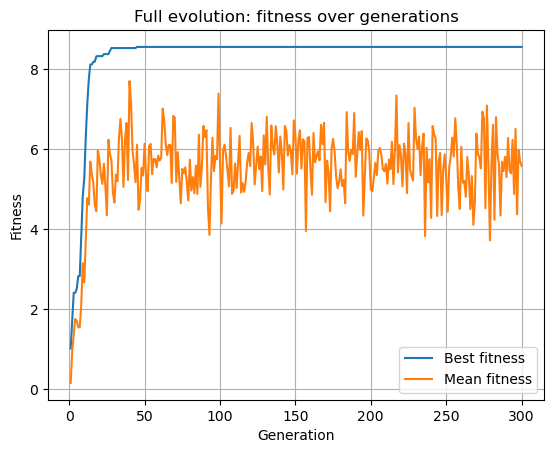

In [20]:
plt.figure()
plt.plot(log["generation"], log["best_fitness"], label="Best fitness")
plt.plot(log["generation"], log["mean_fitness"], label="Mean fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Full evolution: fitness over generations")
plt.legend()
plt.grid(True)
plt.show()


The Full Evolution experiment shows a rapid fitness improvement in the first 20-30 generations. This means the GA quickly discovers optimal body structures and motor patterns. After reaching a fitness of ~8.7, we observe a plateau of the best individual. This means the GA has found a strong local optimum.<br/><br/>
Meanwhile, the mean fitness remained highly variable across all 300 generations. This means the evolving morphology is not stable. Small genome changes often largely affect the behaviour of the creature, so the population does not stabilise. This highlights the difficulty of optimising both body structure and control at the same time.

#### - 3.2 Motor-only

In [21]:
full = pd.read_csv("ga_full_log.csv")
mot = pd.read_csv("ga_motors_only_log.csv")

full.head(), mot.head()

(   generation  best_fitness  mean_fitness
 0         1.0      1.013206      0.152544
 1         2.0      1.706509      0.944280
 2         3.0      2.407441      1.340984
 3         4.0      2.407441      1.753354
 4         5.0      2.507587      1.707274,
    generation  best_fitness  mean_fitness
 0         1.0      0.477481      0.068812
 1         2.0      0.488551      0.481054
 2         3.0      0.490518      0.484511
 3         4.0      0.490518      0.484864
 4         5.0      0.490518      0.487135)

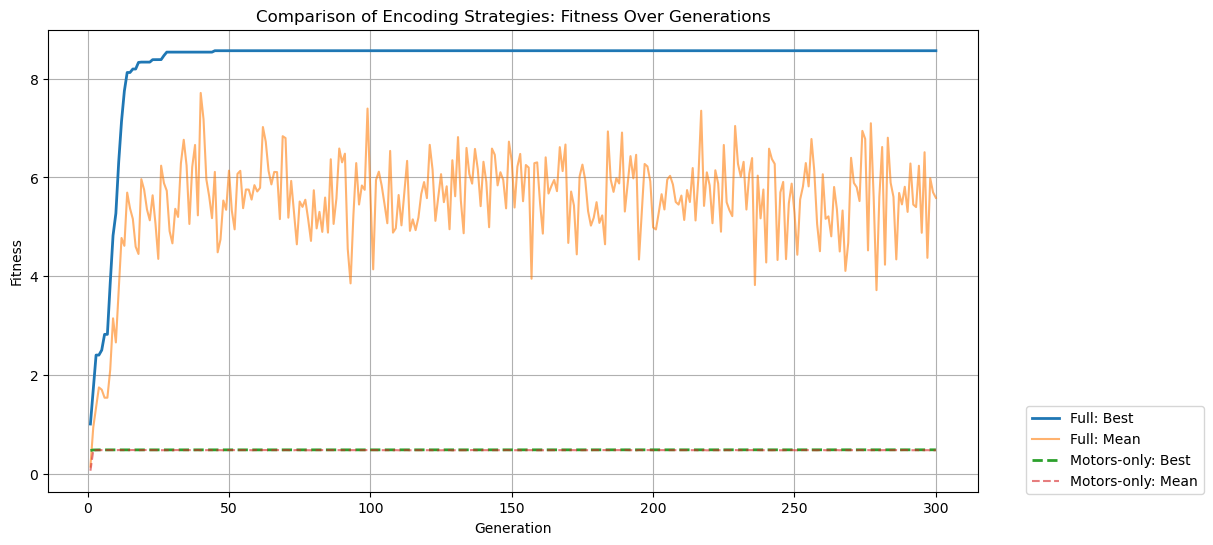

In [22]:
plt.figure(figsize=(12,6))

plt.plot(full["generation"], full["best_fitness"], label="Full: Best", linewidth=2)
plt.plot(full["generation"], full["mean_fitness"], label="Full: Mean", alpha=0.6)

plt.plot(mot["generation"], mot["best_fitness"], label="Motors-only: Best", linewidth=2, linestyle="--")
plt.plot(mot["generation"], mot["mean_fitness"], label="Motors-only: Mean", alpha=0.6, linestyle="--")

plt.title("Comparison of Encoding Strategies: Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(
    loc="lower right",
    bbox_to_anchor=(1.25, -0.02),
    frameon=True
)
plt.grid(True)
plt.show()


In [23]:
def summarise(df):
    best = df["best_fitness"]
    mean = df["mean_fitness"]
    return {
        "Best fitness": best.max(),
        "Mean last 20": mean.tail(20).mean(),
        "Generations to plateau (best)": best.idxmax(),
        "Variance of mean fitness": mean.var()
    }

summary_full = summarise(full)
summary_mot = summarise(mot)

summary_full, summary_mot


({'Best fitness': 8.562003706059391,
  'Mean last 20': 5.607308623868873,
  'Generations to plateau (best)': 44,
  'Variance of mean fitness': 1.015575788837752},
 {'Best fitness': 0.49186367165383776,
  'Mean last 20': 0.4849112431114042,
  'Generations to plateau (best)': 253,
  'Variance of mean fitness': 0.0005789894528751682})

This graph plots the results of Full Evolution and Motors-only on a fitness-over-generation axis. The comparison between encoding strategies highlights a strong performance gap between these two evolutions. In contrast to the Full Evolution, the Motors-only test shows almost no improvement in fitness across the 300 generations. Both best and mean remain close to 0.48, resulting in a nearly flat curve. This shows that with fixed morphology, it is harder for the GA to discover better behaviours via motor tuning alone.
<br/><br/>
Another observation is the low variance in population. This means the fixed body shape determines the climbing ability, which suggests motor control adjustments alone are not enough to make up for morphological limitations.

#### - 3.4 Different Starting Positions

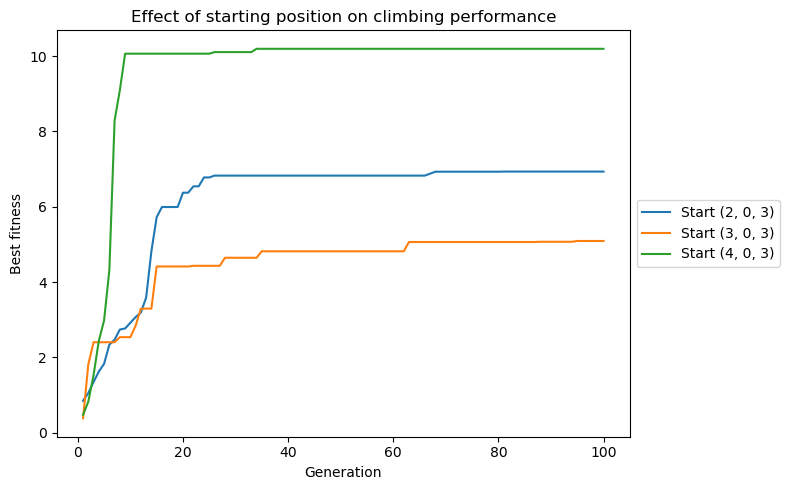

In [24]:
# Load logs for the three starting positions
s2 = pd.read_csv("ga_start2.csv")
s3 = pd.read_csv("ga_start3.csv")
s4 = pd.read_csv("ga_start4.csv")

plt.figure(figsize=(8, 5))

plt.plot(s2["generation"], s2["best_fitness"], label="Start (2, 0, 3)")
plt.plot(s3["generation"], s3["best_fitness"], label="Start (3, 0, 3)")
plt.plot(s4["generation"], s4["best_fitness"], label="Start (4, 0, 3)")

plt.xlabel("Generation")
plt.ylabel("Best fitness")
plt.title("Effect of starting position on climbing performance")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))  # legend outside on the right
plt.tight_layout()
plt.show()


In [25]:
def summarise(df):
    best = df["best_fitness"].max()
    mean_last20 = df["mean_fitness"].tail(20).mean()
    # plateau generation = first generation where best_fitness gets within 1% of final best
    final_best = df["best_fitness"].iloc[-1]
    target = final_best * 0.99
    plateau_gen = df[df["best_fitness"] >= target]["generation"].iloc[0]
    var_mean = df["mean_fitness"].var()
    return {
        "Best fitness": best,
        "Mean last 20": mean_last20,
        "Generations to plateau (best)": plateau_gen,
        "Variance of mean fitness": var_mean
    }

summary_2 = summarise(s2)
summary_3 = summarise(s3)
summary_4 = summarise(s4)

summary_2, summary_3, summary_4


({'Best fitness': 6.934695145425,
  'Mean last 20': 4.237473540949344,
  'Generations to plateau (best)': 67.0,
  'Variance of mean fitness': 0.9679538490820007},
 {'Best fitness': 5.090828250827691,
  'Mean last 20': 1.5384343461723742,
  'Generations to plateau (best)': 63.0,
  'Variance of mean fitness': 0.10480415596348776},
 {'Best fitness': 10.195849953510306,
  'Mean last 20': 3.415615118493065,
  'Generations to plateau (best)': 26.0,
  'Variance of mean fitness': 1.2017293867878827})

Starting positions have a strong impact on climbing performance. The highest starting position (4, 0, 3) produced the best results with fitness rising very quickly and reaching the highest score. Starting on a gentler slope makes climbing easier and the GA finds effective solutions faster.
<br/><br/>
The middle slope position (3, 0, 3) performed the worst with slower improvement and lower final fitness. This means a steeper slope makes climbing harder and limits what the GA can discover.
<br/><br/>
The near-centre position (2, 0, 3) has a moderate performance. Quicker than the middle slope but still not better than the highest start.
<br/><br/>
Overall, this experiment shows that terrain difficulty at the start position directly affects how fast the GA discovers the optimal solution and the maximum fitness.

#### 4.0 Limitations
Firstly, the GA is based on a simple reproduction model which uses elitism and mutation. It does not have any population diversity mechanisms. While this makes the fitness reach stability faster, it increases the risk of reaching stability too early before it finds the optimum solution. Secondly, changing morphology parameters is very sensitive, which can drastically change the creature's shape. This leads to instability and can make the results harder to interpret. Lastly, the computing power of my machine is limited. I used a maximum of 300 generations and 20 population. Larger runs can reveal more complex shapes or movement strategies.

#### 5.0 Conclusion
This project tested ways to find the best way to climb a simulated mountain using evolution. The results show that allowing both morphology and motors to evolve leads to better climbing performance than only evolving motors. Allowing both enables the creatures to have the flexibility to explore more capable shapes while trying to find the best way to move up the mountain. Thus resulting in better fitness and converging faster. However, this flexibility also led to instability that is reflected in the fluctuating mean fitness.
<br/><br/>
Motors-only encoding was more stable, but it was limited. This shows that morphology plays a huge part in effective climbing performance. Additional tests showed that initial environmental conditions also play a part in optimisation, where the easier starting position brings higher fitness and faster convergence.
<br/><br/>
Overall, the findings highlight how encoding design, task difficulty, and environmental setup can affect the performance of genetic algorithms. Future work could explore richer evolutionary possibilities, different terrain, and perhaps conduct larger runs.